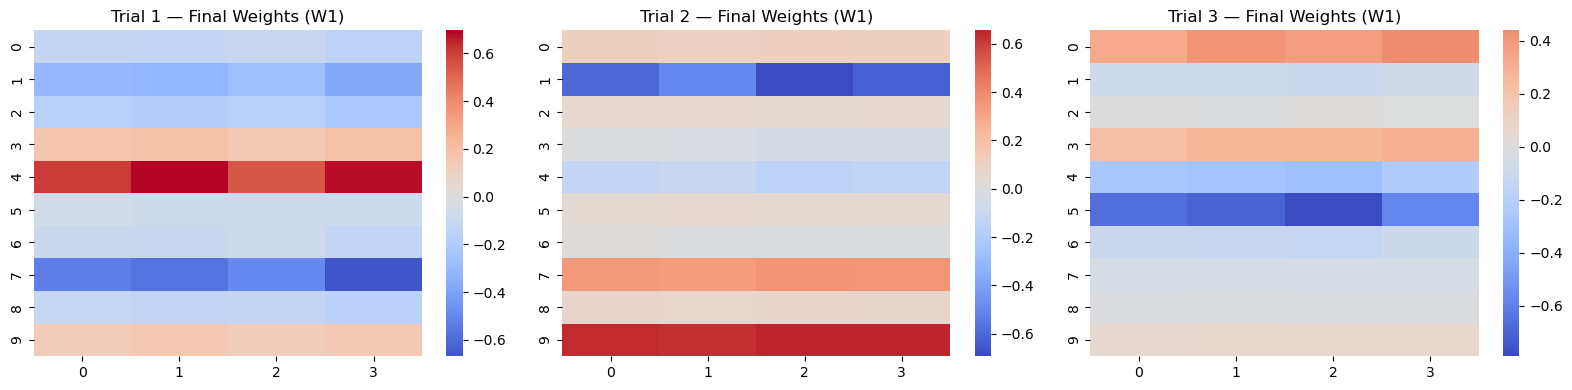

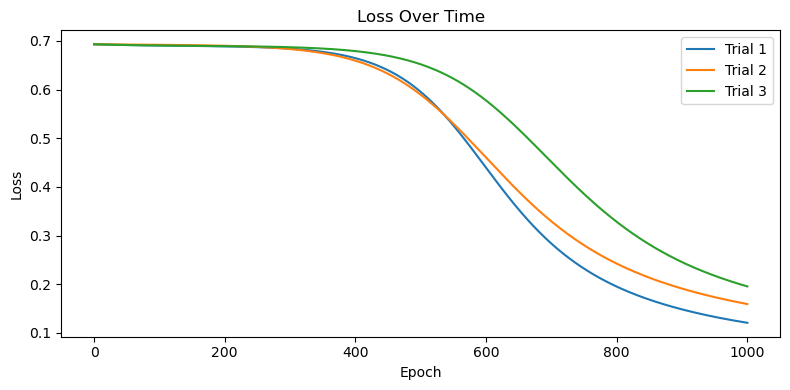

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NN import NeuralNet

# Hold data for each run
all_results = []

for trial in range(3):
    np.random.seed(trial)  # ensure different randomness each time

    X = np.random.randn(4, 100)
    y = (np.sum(X, axis=0, keepdims=True) > 0).astype(float)

    model = NeuralNet(input_size=4, hidden_size=10)

    losses = []
    accuracies = []
    weight_norms_per_neuron = []

    epochs = 1001
    learning_rate = 0.025

    for epoch in range(epochs):
        y_pred = model.forward(X)
        loss = model.loss(y)
        model.back_prop(X, y, learning_rate=learning_rate)

        # Log metrics
        losses.append(loss)
        acc = np.mean((y_pred > 0.5) == y)
        accuracies.append(acc)
        weight_norms_per_neuron.append(np.linalg.norm(model.W1, axis=1))  # shape: (10,)

    # Save everything from this trial
    all_results.append({
        "losses": losses,
        "accuracies": accuracies,
        "weight_norms": np.array(weight_norms_per_neuron),  # shape: (epochs, 10)
        "W1": model.W1,
        "trial": trial
    })

# ===========================
# 🔹 Plot 1: Final Weight Heatmaps
# ===========================
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, result in enumerate(all_results):
    sns.heatmap(result["W1"], ax=axes[i], cmap="coolwarm", center=0)
    axes[i].set_title(f"Trial {i+1} — Final Weights (W1)")
plt.tight_layout()
plt.show()

# ===========================
# 🔹 Plot 2: Loss Over Time for Each Trial
# ===========================
plt.figure(figsize=(8, 4))
for i, result in enumerate(all_results):
    plt.plot(result["losses"], label=f"Trial {i+1}")
plt.title("Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()
